#                                  Regression et Biais-Variance
Le but  est de faire en oeuvre un algorithme de regression linéaire avec
des fonctions polynomiaux et de s'interesser au problème de biais-variance.

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
plt.close("all")


Nous allons construire tout d'abord un problème-jouet

In [2]:
# Creation d'un problème jouet
n = 30 # nombres de points d'apprentissage
d = 5  # degré du polynome
n_t = 1000 # nombre de x pour la partie évaluation

# la vraie fonction que l'on cherche à estimer
def f(x):
    y = -x**2 +x**3-4
    return y


Et des données d'apprentissage et de la partie test

In [3]:
# Création des points d'apprentissage bruité
# 
variance_bruit = 0.8
max_intervalle = 2
x_app = np.sort(np.random.rand(n)*max_intervalle)
bruit =  np.random.randn(n)*variance_bruit
y_app = f(x_app) + bruit

x_true = np.linspace(0,max_intervalle,n_t)
y_true = f(x_true)

Afficher les points d'apprentissage de la fonction,  ainsi que la vraie fonction que l'on cherche à estimer
sur une meme courbe

Text(0, 0.5, 'y')

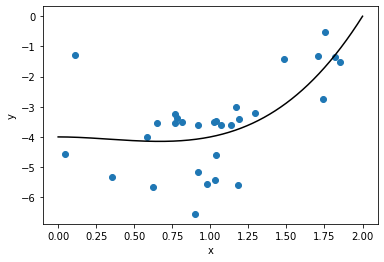

In [4]:
# INSERER votre Code ici
# ------------------------------------------------------------
plt.plot(x_app,y_app,'o')
plt.plot(x_true,y_true,'k-')
plt.xlabel('x')
plt.ylabel('y')
#-------------------------------------------------------------

Pour apprendre le modèle de régression à base de polynomes, il faut construire la matrice H des variables
explicatives 

H_ij = [x_app_i]^j


Creer une fonction permettant de créer cette matrice. les entrées de cette fonction sont 

*   la liste des x
*   le degré du polynome


In [5]:
def matrix_poly(x,d):
  
  # inserer votre code ici
  # ---------------------------------------------------------
  H = np.array([ [xa**i for i in range(0,d+1)] for xa in x]) 
  #---------------------------------------------------------
  return H

Construire la matrice de regréssion pour les x d'apprentissage et 
vérifier sa taille. 

Resoudre ensuite le problème de régression

In [6]:
H_app = matrix_poly(x_app,d)

w_hat = inv(H_app.T@H_app)@(H_app.T@y_app)# 
print(y_app.shape)

(30,)


Appliquer ensuite ce modèle pour obtenir une estimation de la fonction
sur l'ensemble des points x_true. 

Afficher ensuite le résultat sur la meme courbe et calculer
l'erreur quadratique moyenne de votre modèle.

MSE:  0.5062592129942108


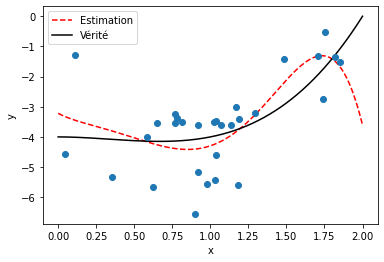

In [7]:
# INSERER votre code ICI
H_test = matrix_poly(x_true,d)
y_test = H_test@w_hat
#-----------------------------------------------------------------------

l1, =plt.plot(x_true,y_test,'r--') 
l2,=plt.plot(x_true, y_true, 'k-')
plt.plot(x_app,y_app,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend((l1,l2),('Estimation','Vérité'))
mse = np.mean( (y_true - y_test)**2)
print('MSE: ', mse)

# Analyse Biais-Variance

Nous allons maintenant analyser le comportement biais-variance de ce modèle. Pour cela, nous allons pour une liste
de dégré de polynomes données, construire un grand nombre de solutions du problèmes, à partir d'un tirage aléatoire
des données d'apprentissage. Pour chacun de ces modèles

 La somme du bias au carré et la variance donne le MSE
d 1  mse 0.4662 bias 0.3839 var 0.08225
 La somme du bias au carré et la variance donne le MSE
d 3  mse 0.11 bias 0.001444 var 0.1086
 La somme du bias au carré et la variance donne le MSE
d 4  mse 0.1853 bias 0.0003144 var 0.185
 La somme du bias au carré et la variance donne le MSE
d 7  mse 3.136 bias 0.009964 var 3.126


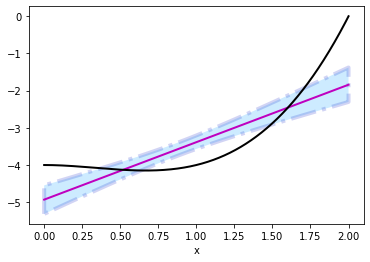

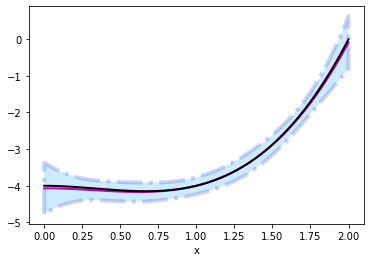

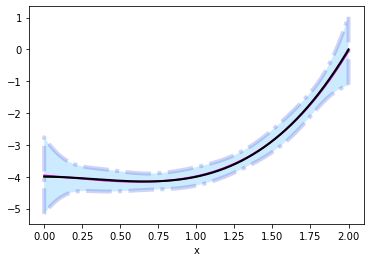

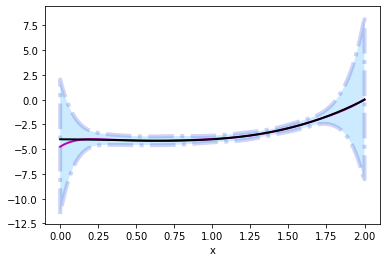

In [8]:

d_vec = [1, 3, 4 , 7]
n_iter = 200
mse = np.zeros((n_iter))
Y_test = np.zeros((n_iter,n_t))
for d in d_vec:
    for i in range(n_iter):
      # inserer votre code ici
      #-------------------------------------------------------------------------
      x_app = np.sort(np.random.rand(n)*2)
      y_app = f(x_app) + np.random.randn(n)*0.8
        
      X = matrix_poly(x_app,d)
      w_hat = inv(X.T@X)@(X.T@y_app)
        
      X_test = matrix_poly(x_true,d)
      y_test = X_test@w_hat
      
      #-------------------------------------------------------------------------
      # Stockage des résultats 
      # on garde les modèles et on garde les MSE 
      Y_test[i]= y_test
      mse[i]= np.mean( (y_true - y_test)**2)
      
    # pour l'ensemble des modèles liées à un degré donné, on calcul les mse moyens
    # le biais et la variance
    
    M_y_test = np.mean(Y_test, axis = 0)
    S_y_test = np.std(Y_test, axis = 0)
    
    # INSERER VOTRE CODE
    #---------------------------------------------------------------------------
    
    # Le biais est l'écart de la moyenne des estimations à la vraie valeur
    bias_square = np.mean( (y_true - M_y_test)**2)
    # la variance est l'ecart de chaque estimation à la moyenne des estimations
    # au carré
    variance = np.mean( (Y_test - M_y_test)**2)
    #---------------------------------------------------------------------------
    
    # on affiche les comportements des modèles en chaque point
    fig, ax = plt.subplots()
    plt.plot(x_true, M_y_test, 'm',x_true,y_true, 'k',lw = 2)
    plt.fill_between(x_true, M_y_test + S_y_test, M_y_test - S_y_test,
                         alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
                         linewidth=4, linestyle='dashdot', antialiased=True)
    plt.xlabel('x')
    print(' La somme du bias au carré et la variance donne le MSE')
    print('d {:d}  mse {:2.4} bias {:2.4} var {:2.4}'.format(d,np.mean(mse), bias_square, variance))

**La somme du biais au carré et de la variance doit etre égale à la MSE**



Comme le rôle du dégré du polynome est critique, on veut maintenant mettre en oeuvre un principe
de validation pour sélectionner le bon degré.

Etant donné, un jeu de données d apprentissage (bruité donc), pour chaque degré, 
nous allons séparer le jeu de données en deux parties égales, contruire un modèle
sur la première partie et la tester sur la deuxieme partie. Nous allons répeter ce processus
de découpage 10 fois.


*   Afficher ensuite la moyenne des performances pour chaque degré
*   Quel est le degré aboutissant à la meilleure performance?




[1, 2, 3, 4, 5, 6, 7]


Text(0, 0.5, 'MSE')

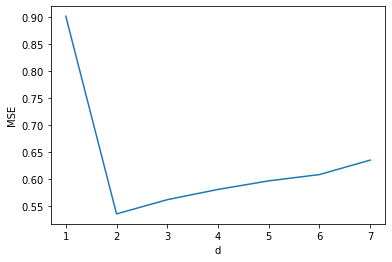

In [9]:
from sklearn.model_selection import train_test_split

d_vec = [1, 2, 3, 4, 5, 6, 7]
n = 100
x_app = np.sort(np.random.rand(n)*2)
y_app = f(x_app) + np.random.randn(n)*0.8

mse = np.zeros((len(d_vec),10))
for k in range(10):
    xa, xv, ya, yv = train_test_split(x_app,y_app,test_size  = 0.5)
    for i,d in enumerate(d_vec):
            # INSERER VOTRE CODE ICI
            #-------------------------------------------------------------------
            X = matrix_poly(xa,d)
            w_hat = inv(X.T@X)@(X.T@ya)
            
            X_v = matrix_poly(xv,d)
            y_vpred  = X_v@w_hat
            
            mse[i,k] =  np.mean( (y_vpred - yv)**2)
            #-------------------------------------------------------------------

print(d_vec) 
plt.plot(d_vec,np.mean(mse,axis=1))
plt.xlabel('d')
plt.ylabel('MSE')


# **Regression ridge**

On cherche maintenant à étudier si le dilemme biais/variance peut se controler par un 
algorithme de regression ridge. 

1.   fixer le degré du polynome à 7 et choissisez le paramètre lambda de la régression ridge par une meme méthode
2.   Comparer le MSE obtenue sur les vrais données de test avec le MSE du modèle de degré optimal.




### Sélection du meilleur $\lambda$

On effectue une méthode de selection par ré-échantillonage en séparant l'ensemble d'apprentissage 
en une sous-partie apprentissage/validation.

On sélectionne le meilleur lambda comme étant celui qui aboutit au meilleur résultat
moyen sur les données de validation.


le lambda optimal est 0.060


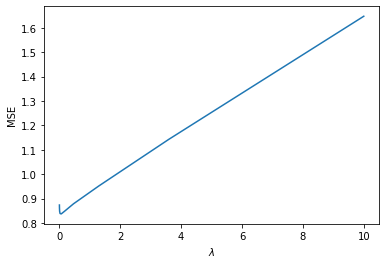

In [10]:

n = 100
x_app = np.sort(np.random.rand(n)*2)
y_app = f(x_app) + np.random.randn(n)*0.8
d = 7
lamb_vec = np.logspace(-3,1,10)
mse = np.zeros((len(lamb_vec),10))
eye = np.eye(d+1)
for k in range(10):
    xa, xv, ya, yv = train_test_split(x_app,y_app,test_size  = 0.5)
    for i,lamb in enumerate(lamb_vec):
       
            X = matrix_poly(xa,d)
            w_hat = inv(X.T@X + lamb * eye )@(X.T@ya)
            
            X_v = matrix_poly(xv,d)
            y_vpred  = X_v@w_hat
            mse[i,k] =  np.mean( (y_vpred - yv)**2)

            
            
            
plt.plot(lamb_vec,np.mean(mse,axis=1))
plt.xlabel('$\lambda$')
plt.ylabel('MSE')
lamb_opt = lamb_vec[np.argmin(np.mean(mse,axis=1))]
print('le lambda optimal est {:2.3f}'.format(lamb_opt))




Une fois ce meilleur $\lambda$ sélectionné, on apprend un modèle utilisant **l'ensemble des données d'apprentissage **
et on l'évalue sur les données de test.

et on aboutit à un MSE qui est **proche** (voire meilleure) de celui obtenu avec un dégré du polynome optimal.



In [11]:
X = matrix_poly(x_app,d)
w_hat = inv(X.T@X + lamb_opt * eye )@(X.T@y_app)
y_test = X_test@w_hat

print('MSE reg', np.mean( (y_true - y_test)**2))

MSE reg 0.052316909249890894
